In [1]:
from brian2 import *
from scipy import stats

In [6]:
M2.INa.shape

(1000, 15000)

In [5]:
M2.t.shape

(15000,)

Starting simulation at t=0. s for a duration of 50. ms
50. ms (100%) simulated in 1s
Starting simulation at t=100. ms for a duration of 50. ms
50. ms (100%) simulated in 1s


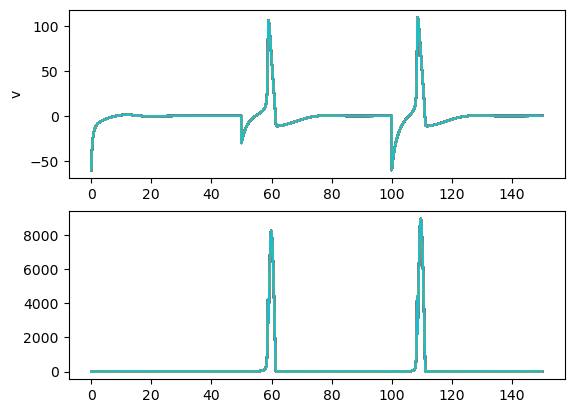

In [4]:
defaultclock.dt = 0.01*ms

morpho = Cylinder(length=10*cm, diameter=2*238*um, n=1000, type='axon')

El = 10.613*mV
ENa = 115*mV
EK = -12*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
INa = gNa * m**3 * h * (ENa-v) : amp/meter**2
Il = gl * (El-v) : amp/meter**2
IK = gK * n**4 * (EK-v) : amp/meter**2
Im = INa + Il + IK : amp/meter**2
I : amp (point current) # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * 10*mV/exprel((-v+25*mV)/(10*mV))/ms : Hz
betam = 4 * exp(-v/(18*mV))/ms : Hz
alphah = 0.07 * exp(-v/(20*mV))/ms : Hz
betah = 1/(exp((-v+30*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * 10*mV/exprel((-v+10*mV)/(10*mV))/ms : Hz
betan = 0.125*exp(-v/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs, method="exponential_euler",
                       refractory="m > 0.4", threshold="m > 0.5",
                       Cm=1*uF/cm**2, Ri=35.4*ohm*cm)
neuron.v = 0*mV
neuron.h = 1
neuron.m = 0
neuron.n = .5
neuron.I = 0*amp
neuron.gNa = gNa0
M = StateMonitor(neuron, 'v', record=True)
M2 = StateMonitor(neuron, 'INa', record=True)
spikes = SpikeMonitor(neuron)

neuron.v = -60*mV
run(50*ms, report='text')
# neuron.I[0] = 1*uA # current injection at one end
neuron.v = -30*mV
run(50*ms)
neuron.v = -60*mV
# neuron.I = 0*amp
run(50*ms, report='text')

# Calculation of velocity
# slope, intercept, r_value, p_value, std_err = stats.linregress(spikes.t/second,
#                                                 neuron.distance[spikes.i]/meter)
# print("Velocity = %.2f m/s" % slope)

subplot(211)
for i in range(100):
    plot(M.t/ms, M.v.T[:, i*10]/mV)
ylabel('v')
subplot(212)
# for i in range(100):
plot(M2.t/ms, M2.INa.T[:, i*10]/mV)
# plot(spikes.t/ms, spikes.i*neuron.length[0]/cm, '.k')
# plot(spikes.t/ms, (intercept+slope*(spikes.t/second))/cm, 'r')
# xlabel('Time (ms)')
# ylabel('Position (cm)')
# show()